<a href="https://colab.research.google.com/github/vedrosuwandi/DataScienceFP/blob/main/DataScience_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')


Mounted at /content/drive


Plot Data

In [ ]:
multi = pd.read_csv("/content/drive/My Drive/DataScience FP/multi gacha.csv")

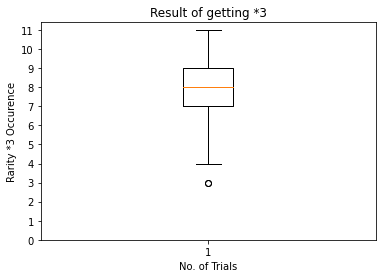

In [ ]:
def boxplot(data, Y, ylabel, title):
    x = data["number of trial"]
    y = data[Y]
    plt.boxplot(y)
    plt.xlabel('No. of Trials')
    plt.ylabel(ylabel)
    plt.yticks(np.linspace(0, 11, 12))
    plt.title(title )
    plt.show()
boxplot(multi, 'rarity *3','Rarity *3 Occurence', "Result of getting *3")

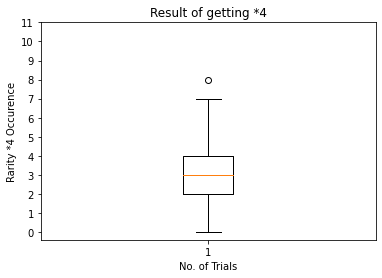

In [ ]:
boxplot(multi,'rarity *4','Rarity *4 Occurence' ,  "Result of getting *4")

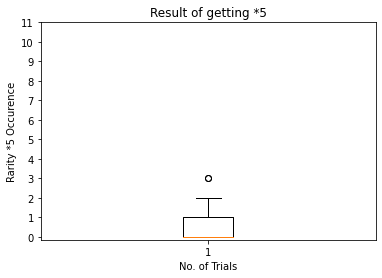

In [ ]:
boxplot(multi,'rarity *5','Rarity *5 Occurence', "Result of getting *5")

In [ ]:
n = 11
budgets = 200
#takes the data randomly
samples = []
budget = 0
for i in range (budgets):
    budget += 1
    samples_col = []
    sampling = pd.DataFrame(multi).sample(n).sort_values(by="number of trial")
    for j in range(sampling['rarity *5'].count()):
        samples_col.append(sampling['rarity *5'].iloc[j])
    samples.append(samples_col)
    #print(sampling['rarity *5'] , '\n')    
print(np.matrix(samples))
#print(samples)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [1 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
samples[0]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
totals = [[]]
for i in range(1, len(samples)):
    totals.append([])
    for j in range(0, len(samples[i])):
        newValue = 0
        for k in range(j, j+(i+1)):
            x = np.random.randint(10)
            #print(samples[i][x])
            #print(" ")  
            newValue += samples[i][x]
        #print("result = ", newValue)
               
        totals[i].append(newValue)
        #print("-----")
    #print("end of budget ", i + 1)
    
for i in range(0, len(samples[i])):
    x = x = np.random.randint(10)
    totals[0].append(samples[0][x]) 
print(totals)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 1, 0, 3, 2, 0, 0, 1, 0, 0, 1], [0, 1, 1, 0, 3, 0, 0, 2, 1, 1, 1], [6, 0, 5, 3, 4, 2, 2, 2, 1, 4, 1], [0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 2], [2, 2, 0, 3, 2, 2, 1, 1, 4, 3, 3], [3, 4, 0, 3, 3, 2, 2, 0, 4, 6, 4], [1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 3, 6, 6, 6, 4, 4, 4, 6, 3, 8], [4, 4, 4, 5, 2, 4, 4, 5, 5, 2, 5], [4, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3], [3, 4, 1, 1, 1, 2, 1, 2, 0, 1, 4], [4, 1, 0, 0, 1, 5, 3, 2, 0, 0, 0], [8, 6, 5, 6, 4, 10, 8, 6, 7, 4, 5], [7, 5, 7, 5, 7, 6, 9, 8, 7, 5, 8], [8, 6, 6, 4, 4, 4, 4, 6, 8, 6, 8], [7, 2, 4, 7, 8, 5, 4, 4, 1, 8, 6], [6, 2, 3, 4, 4, 6, 4, 7, 5, 5, 4], [7, 6, 8, 7, 6, 5, 6, 7, 6, 6, 4], [17, 6, 14, 15, 13, 14, 17, 9, 18, 18, 8], [4, 9, 7, 10, 9, 13, 7, 9, 7, 5, 6], [15, 10, 9, 8, 6, 7, 10, 9, 14, 5, 2], [4, 5, 6, 4, 4, 4, 8, 4, 5, 6, 7], [12, 8, 8, 7, 6, 9, 6, 10, 8, 11, 8], [8, 4, 6, 9, 9, 5, 4, 9, 8, 4, 5], [9, 10, 15, 11, 12, 12, 8, 10, 13, 1

# decision tree regressor

> Indented block



#### link: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html



In [ ]:
x = [[budget for sample in range(n)] for budget in range(0, budgets)]
y = totals
print(x)
print("    ")
print(y)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17], [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23], [24, 

In [ ]:
X = np.array(x)
Y = np.array(y)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(Y)
print(x_scaled)
print(y_scaled)

[[-1.7234121  -1.7234121  -1.7234121  ... -1.7234121  -1.7234121
  -1.7234121 ]
 [-1.70609137 -1.70609137 -1.70609137 ... -1.70609137 -1.70609137
  -1.70609137]
 [-1.68877065 -1.68877065 -1.68877065 ... -1.68877065 -1.68877065
  -1.68877065]
 ...
 [ 1.68877065  1.68877065  1.68877065 ...  1.68877065  1.68877065
   1.68877065]
 [ 1.70609137  1.70609137  1.70609137 ...  1.70609137  1.70609137
   1.70609137]
 [ 1.7234121   1.7234121   1.7234121  ...  1.7234121   1.7234121
   1.7234121 ]]
[[-1.09361211 -1.09038658 -1.09189858 ... -1.14410582 -1.12936603
  -1.0994421 ]
 [-1.09361211 -1.0559025  -1.09189858 ... -1.14410582 -1.12936603
  -1.06542471]
 [-1.09361211 -1.0559025  -1.09189858 ... -1.14410582 -1.12936603
  -1.06542471]
 ...
 [ 1.22632623  0.46139698  1.97714803 ...  1.23907745  0.88735902
   1.65596663]
 [ 3.23921392  3.01321882  3.00016357 ...  3.15985204  2.8333218
   3.52692317]
 [-0.47951079 -0.46967316 -0.44398874 ... -0.36156803 -0.10331293
  -0.52114644]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=10)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_1.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
  Y_pred = regr_1.predict(X_test)
  

In [ ]:
DTr_square = metrics.r2_score(X_test,Y_test)
print("r2 score = ", DTr_square)

DTmse = mean_squared_error(Y_test, Y_pred)
print('mse = ', DTmse)
DTRrmse = np.sqrt(DTmse)
print("rmse = ", DTRrmse)

r2 score =  0.23422455377877796
mse =  0.6736943507278302
rmse =  0.8207888587985526


[]

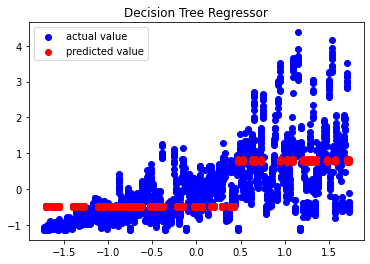

In [ ]:
plt.figure()
plt.scatter(x_scaled, y_scaled, color='blue', label="actual value")
#plt.scatter(x_scaled, y_scaled, color='blue', label="actual value")
plt.scatter(X_test, Y_pred, color="red", label="predicted value")
#plt.xlabel("budget")
#plt.ylabel("samples")
plt.legend()
plt.title("Decision Tree Regressor")
plt.plot()

In [ ]:
  #to see the test data and the predicted data
df = pd.DataFrame({'Real Values':Y_test.reshape(-1), 'Predicted Values':Y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,-0.566190,-0.611671
1,-0.439694,-0.582076
2,-0.566506,-0.598242
3,-0.683879,-0.586171
4,-0.419043,-0.587729
...,...,...
655,-0.024665,-0.618096
656,0.031557,-0.619189
657,-0.037376,-0.584094
658,-0.026715,-0.601823


# polynomial regression
#### link: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

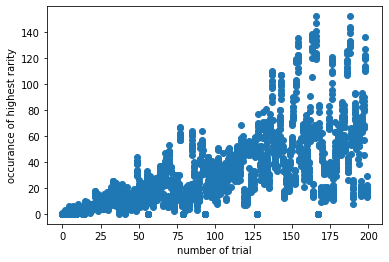

In [ ]:
plt.scatter(X, Y)
plt.xlabel("number of trial")
plt.ylabel("occurance of highest rarity")
plt.show()

In [ ]:
polynomial_feature = PolynomialFeatures(degree=2)
x_poly = polynomial_feature.fit_transform(x_scaled)
model = LinearRegression()
model.fit(x_poly, y_scaled)
y_poly_pred = model.predict(x_poly)
y_poly_pred

array([[-1.06484598, -1.06987821, -1.07339536, ..., -1.11278163,
        -1.12868105, -1.09691786],
       [-1.05573409, -1.06057896, -1.06432797, ..., -1.10265384,
        -1.11811968, -1.08755483],
       [-1.0465981 , -1.05125769, -1.0552345 , ..., -1.09251006,
        -1.10754646, -1.07816662],
       ...,
       [ 1.19531813,  1.18718476,  1.21615309, ...,  1.19127319,
         1.18070212,  1.23354515],
       [ 1.20917616,  1.20082187,  1.23035591, ...,  1.20455282,
         1.19359812,  1.24786681],
       [ 1.22305827,  1.214481  ,  1.2445848 , ...,  1.21784845,
         1.20650596,  1.26221363]])

In [ ]:
polymse = mean_squared_error(y_scaled, y_poly_pred)
polyrmse = np.sqrt(polymse)
polyr2 = r2_score(y_scaled,y_poly_pred)
print("mean squared error = ", polymse) # mean squared error
print("root mean squared error = ", polyrmse)
print("r2 score = ", polyr2) # r2 score

mean squared error =  0.5439611890802802
root mean squared error =  0.7375372458935754
r2 score =  0.4560388109197197


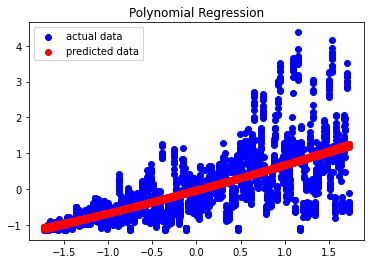

In [ ]:
plt.title("Polynomial Regression")
plt.scatter(x_scaled, y_scaled, color="blue", label="actual data")
plt.scatter(x_scaled, y_poly_pred, color='red', label="predicted data")
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'Real Values':y_scaled.reshape(-1), 'Predicted Values':y_poly_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,-1.172606,-1.078428
1,-1.125141,-1.039519
2,-1.124052,-1.073676
3,-1.122007,-1.056054
4,-1.138772,-1.078725
...,...,...
2195,0.416492,1.184431
2196,0.674767,1.236818
2197,0.797612,1.206632
2198,0.210750,1.157852


# Random Forest 
### link: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [ ]:
# random forest for regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
RFMAE = metrics.mean_absolute_error(Y_test, y_pred)
RFMSE = metrics.mean_squared_error(Y_test, y_pred)
RFRMSE =  np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
RFr2score = r2_score(Y_test, y_pred)
#r2s = r2_score(Y_train, y_pred)

In [ ]:
print('Mean Absolute Error:',RFMAE)
print('Mean Squared Error:', RFMSE)
print('Root Mean Squared Error:', RFRMSE)
print("Coefficient of Determination : ",RFr2score)

Mean Absolute Error: 0.6200986887187949
Mean Squared Error: 0.8473530619367037
Root Mean Squared Error: 0.9205178227154017
Coefficient of Determination :  0.1837368679380612


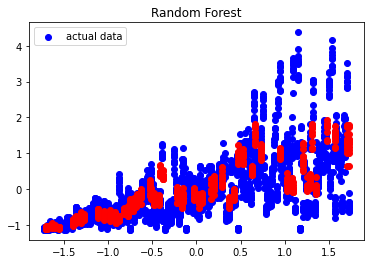

In [ ]:
plt.title("Random Forest")
plt.scatter(x_scaled, y_scaled, color="blue", label="actual data")
plt.plot(X_test, y_pred, "o", color="red", linewidth="1")
plt.legend()

In [ ]:
df = pd.DataFrame({'Real Values':Y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,-0.566190,-0.464919
1,-0.439694,-0.491909
2,-0.566506,-0.528872
3,-0.683879,-0.409650
4,-0.419043,-0.499412
...,...,...
655,-0.024665,-0.480861
656,0.031557,-0.777077
657,-0.037376,-0.533199
658,-0.026715,-0.608502


# Results

In [ ]:
import pandas as pd
data = [['Decision Tree', DTr_square, DTmse, DTRrmse],['Polynomial Regression', polyr2, polymse, polyrmse],['Random Forest', RFr2score, RFMSE, RFRMSE]]
df = pd.DataFrame(data,columns=['Model', 'R2Score', 'Mean Squared Error' , 'Root Mean Squared Error'])
df

,Model,R2Score,Mean Squared Error,Root Mean Squared Error
0,Decision Tree,0.234225,0.673694,0.820789
1,Polynomial Regression,0.456039,0.543961,0.737537
2,Random Forest,0.183737,0.847353,0.920518


<function matplotlib.pyplot.show>

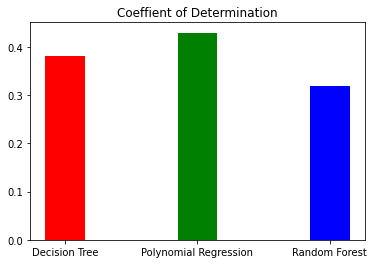

In [ ]:
plt.title('Coeffient of Determination (R2Score)')
plt.bar(df['Model'] , df['R2Score'] , color=['red' , 'green' , 'blue'], width = 0.3, align='center')
plt.show()

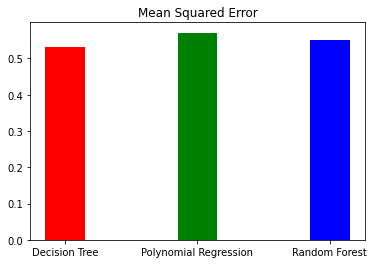

In [ ]:
plt.title('Mean Squared Error')
plt.bar(df['Model'] , df['Mean Squared Error'] , color=['red' , 'green' , 'blue'], width = 0.3, align='center')
plt.show()

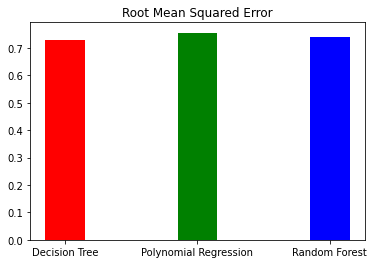

In [ ]:
plt.title('Root Mean Squared Error')
plt.bar(df['Model'] , df['Root Mean Squared Error'] , color=['red' , 'green' , 'blue'], width = 0.3, align='center')
plt.show()